

# Tema 2: Procesamiento de imágenes digitales. Operaciones de filtrado en el dominio de la frecuencia

Una  imagen  digital  puede  entenderse  como  una  señal  discreta  bidimensional,  de forma que su transformada de Fourier es una suma finita de términos senos y cosenos con distintas amplitudes y frecuencias. Es posible realizar filtrados de imágenes (paso alto, paso bajo y paso banda) en el dominio de Fourier y ello presenta ventajas debido a la localización de tipos de frecuencias en el espectro de Fourier. Para procesar imágenes usando Fourier se utiliza la transformada rápida (FFT) ya que reduce considerablemente el número de operaciones a realizar.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

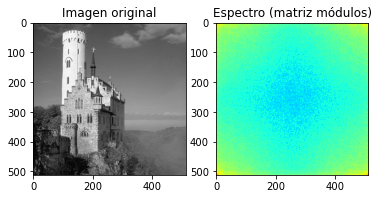

In [2]:
# Primero cargamos y visualizamos una imagen cualquiera y calculamos sus transformada de Fourier, visualizando 
# su espectro o matriz de módulos
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

image = cv2.imread("Lichtenstein_img_processing_test.png",0)

plt.subplot(1,2,1)
plt.title('Imagen original')
plt.imshow(image, cmap="gray")

F = np.fft.fft2(image) # Se calcula la FFT en 2D de la imagen

plt.subplot(1,2,2)
plt.title('Espectro (matriz módulos)')
plt.imshow(np.absolute(F), norm=LogNorm(), cmap="jet") # Se visualiza la matriz de módulos 
plt.show()

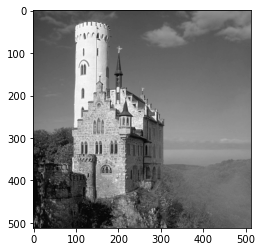

In [3]:
# Si aplicamos a continuación la transformada inversa podemos recuperar la imagen original (sin pérdida de información)
I_F = np.fft.ifft2(F)
plt.imshow(np.abs(I_F), cmap="gray")

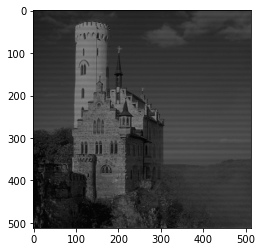

In [4]:
# A continuación introducimos ruido artificial (en forma de líneas) en la imagen

img_noisy = image.copy()
img_noisy[0:512:2,:] = 0 # Se introduce una línea negra de ruido cada dos filas de la imagen

plt.imshow(img_noisy, cmap="gray")
plt.show()

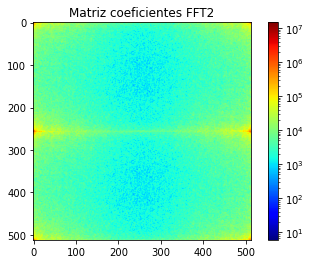

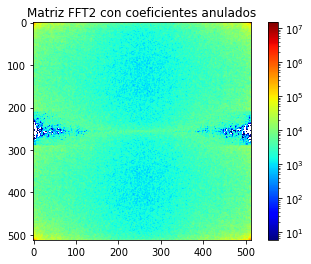

In [5]:
# Ahora se elimina el ruido añadido usando la transformada de Fourier

C_R = np.fft.fft2(img_noisy)
C_F = C_R.copy()
for r in range(210,290):  # se ponen a cero los coeficientes de Fourier por encima de un valor umbral para eliminar ruido
    for c in range(0,512):
        if (np.abs(C_R[r,c]) > 10000):  
            C_F[r,c] = 0

plt.figure()
plt.title('Matriz coeficientes FFT2') # original
plt.imshow(np.abs(C_R), norm=LogNorm(), cmap="jet")
plt.colorbar()

plt.figure()
plt.title('Matriz FFT2 con coeficientes anulados') # eliminación de ruido
plt.imshow(np.abs(C_F), norm=LogNorm(), cmap="jet")
plt.colorbar()

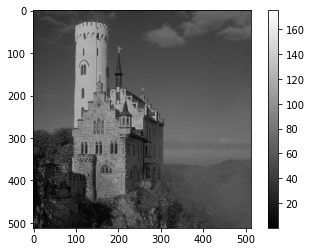

In [6]:
# Luego realizando la transformada inversa de Fourier se observa  el resultado del filtrado en el espacio de la imagen
I_F = np.abs(np.fft.ifft2(C_F))
plt.imshow(I_F, cmap="gray")
plt.colorbar()

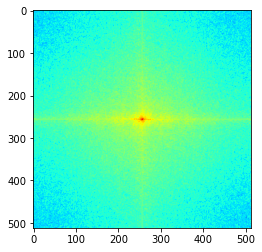

In [7]:
# Se desplaza el espectro de Fourier al centro de la imagen de la transformada con "fftshift". 
# En dicho centro queda ahora localizada la zona de bajas frecuencias.

from matplotlib.colors import LogNorm

I = cv2.imread("Lichtenstein_img_processing_test.png", 0)
F = np.fft.fft2(I)
F = np.fft.fftshift(F)

plt.imshow(np.absolute(F), norm=LogNorm(), cmap="jet")

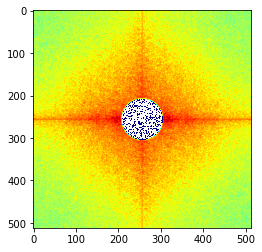

In [8]:
# Se realiza un filtrado paso alto alto (anulando los coeficientes de bajas frecuencias en el centro)
radio = 50
for r in range(0,512):
  for c in range(0,512):
    if (np.sqrt((r-256)*(r-256)+(c-256)*(c-256)) < radio):
      F[r,c] = 0.0

plt.imshow(np.absolute(F), norm=LogNorm(), cmap="jet")      

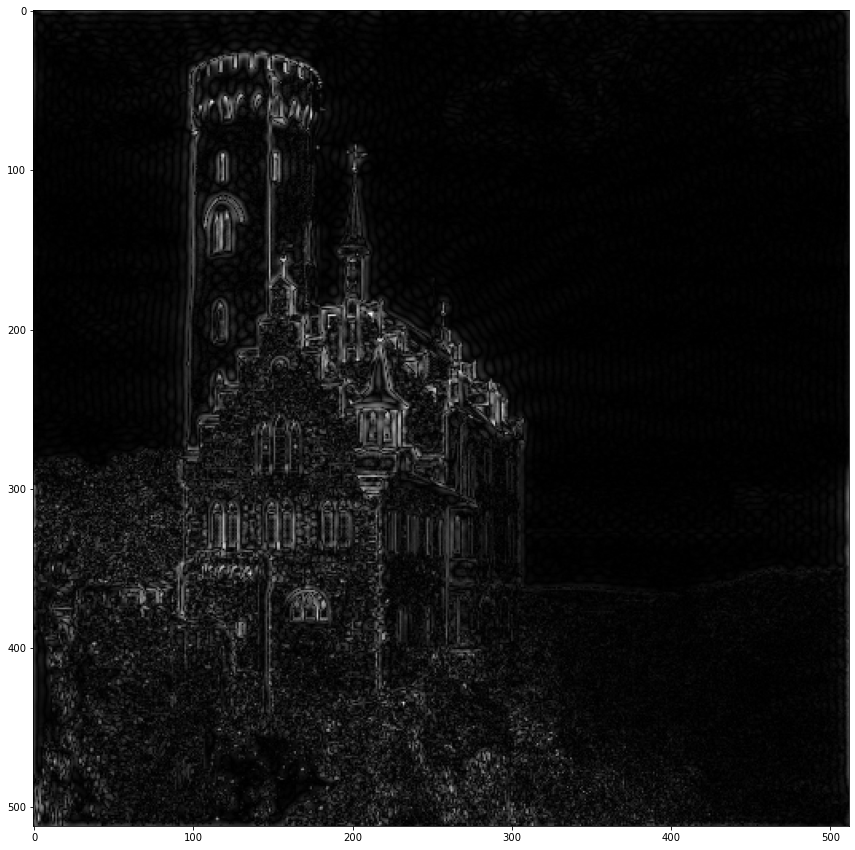

In [9]:
# Aplicando la transformada inversa se obtiene el resultado del filtrado paso alto en el dominio espacial

plt.figure(figsize=(15, 15))
F2 = np.fft.ifftshift(F)
I_F = np.fft.ifft2(F2)
plt.imshow(np.abs(I_F), cmap="gray")

Podemos observar como aparecen efectos de "rejilla" que no deberían aparecer en la imagen de bordesdebido a utilizar un filtro con un corte abrupto en el espacio de frecuencias.

A continuación vamos a usar un filtro en el espacio de frecuencias que no tiene ese "corte abrupto" y produce unos resultados adecuados.

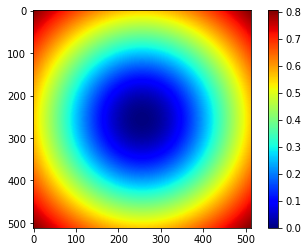

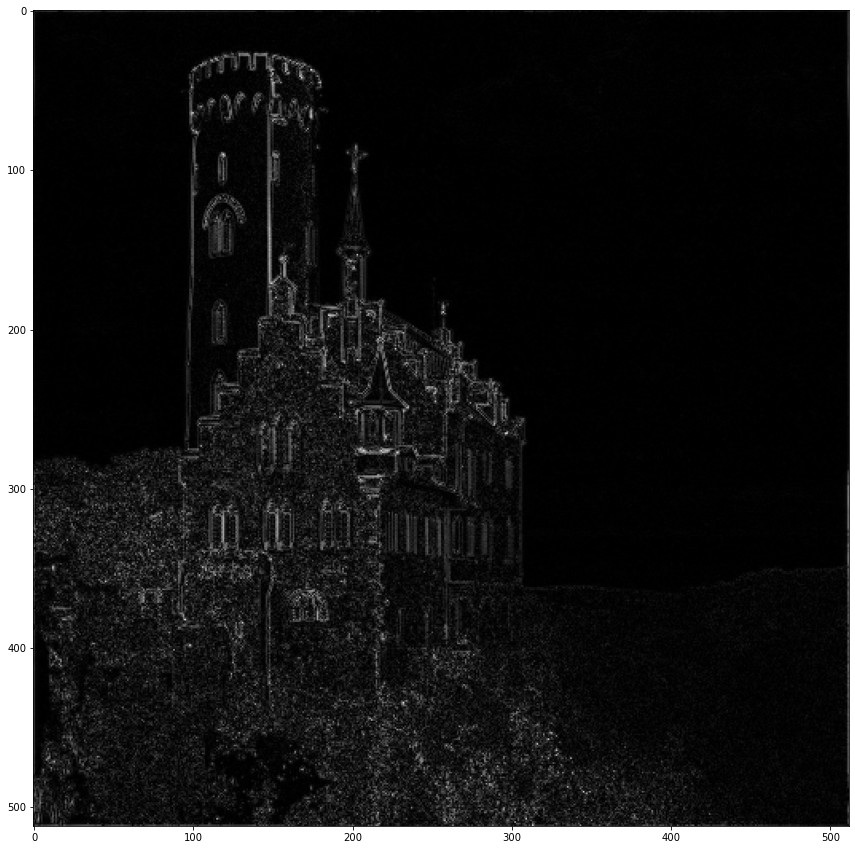

In [10]:
# Vamos a filtrar correctamente con una Gaussiana
I = cv2.imread("Lichtenstein_img_processing_test.png", 0)
F = np.fft.fft2(I)
F = np.fft.fftshift(F)

# Montamos el kernel gaussiano en el dominio del espacio
sigma = 200
gaussian_kernel_vt = cv2.getGaussianKernel(I.shape[0], sigma)
gaussian_kernel_hz = cv2.getGaussianKernel(I.shape[1], sigma)
G = gaussian_kernel_hz.reshape(I.shape[1], 1) * gaussian_kernel_vt.reshape(1, I.shape[0])
G /= G.max()
G = 1 - G

plt.figure()
plt.imshow(G, cmap="jet")      
plt.colorbar()

F_filtrada = F * G
#plt.figure()
#plt.imshow(np.absolute(F_filtrada), norm=LogNorm(), cmap="jet")
I_filtrada = np.fft.ifft2(F_filtrada)
plt.figure(figsize=(15,15))
plt.imshow(np.abs(I_filtrada), cmap="gray")

*Ejercicio:* Aplicar un procedimiento similar para realizar un filtrado paso bajo de la imagen usando la transformada de Fourier

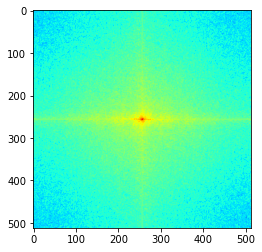

In [11]:
# Se desplaza el espectro de Fourier al centro de la imagen de la transformada con "fftshift". 
# En dicho centro queda localizada la zona de bajas frecuencias.

from matplotlib.colors import LogNorm

I = cv2.imread("Lichtenstein_img_processing_test.png", 0)
F = np.fft.fft2(I)
F = np.fft.fftshift(F)

plt.imshow(np.absolute(F), norm=LogNorm(), cmap="jet")

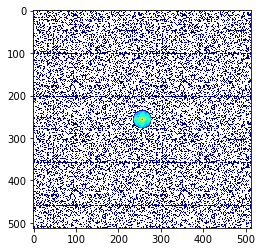

In [12]:
# Se realiza un filtrado paso alto bajo (anulando los coeficientes de altas frecuencias)

radio = 20
for r in range(0,512):
  for c in range(0,512):
    if (np.sqrt((r-256)*(r-256)+(c-256)*(c-256)) >= radio):
      F[r,c] = 0.0

plt.imshow(np.absolute(F), norm=LogNorm(), cmap="jet")      

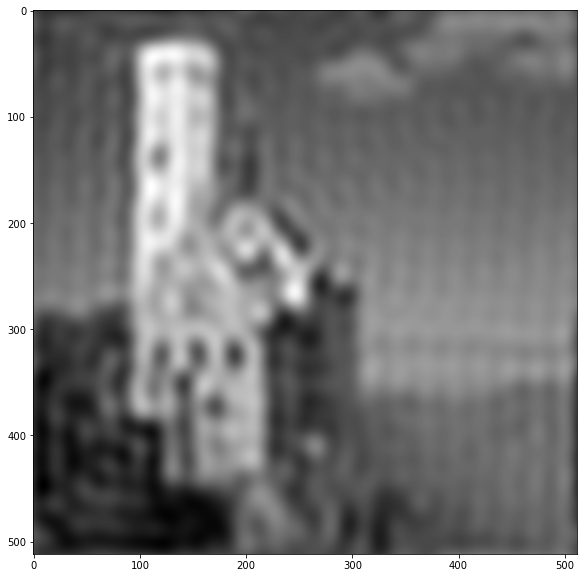

In [13]:
# Aplicando la transformada inversa se obtiene el resultado del filtrado paso bajo en el dominio espacial
plt.figure(figsize=(10,10))
F2 = np.fft.ifftshift(F)
I_F = np.fft.ifft2(F2)
plt.imshow(np.abs(I_F), cmap="gray")

Podemos observar como aparecen líneas que no deberían aparecer en la imagen suavizada (en inglés "ringing") debido a utilizar un filtro con un corte abrupto en el espacio de frecuencias.

A continuación vamos a usar un filtro en el espacio de frecuencias que no tiene ese "corte abrupto" y produce unos resultados adecuados.

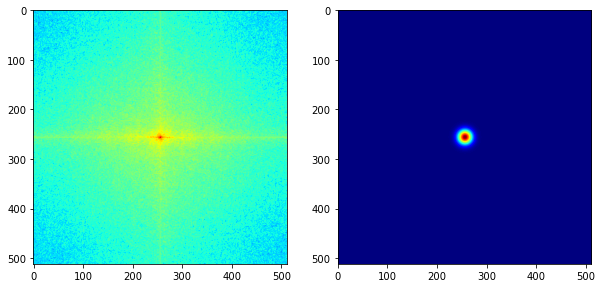

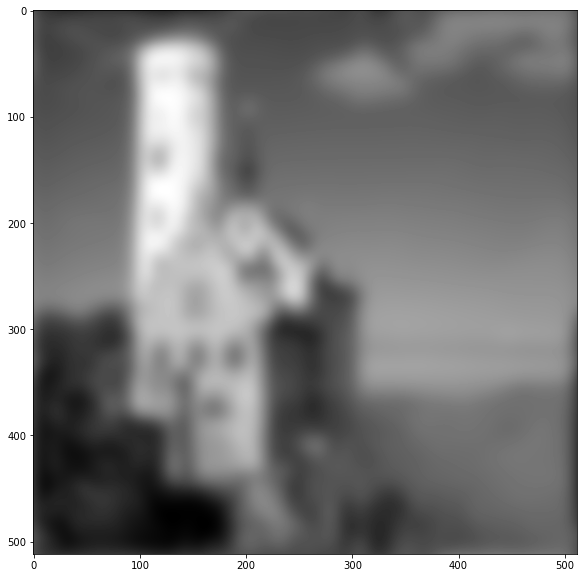

In [19]:
# Vamos a filtrar correctamente con una Gaussiana
I = cv2.imread("Lichtenstein_img_processing_test.png", 0)
F = np.fft.fft2(I)
F = np.fft.fftshift(F)

# Montamos el kernel gaussiano en el dominio de la frecuencia
sigma = 10
gaussian_kernel_vt = cv2.getGaussianKernel(I.shape[0], sigma)
gaussian_kernel_hz = cv2.getGaussianKernel(I.shape[1], sigma)
G = gaussian_kernel_hz.reshape(I.shape[1], 1) * gaussian_kernel_vt.reshape(1, I.shape[0])

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(np.absolute(F), norm=LogNorm(), cmap="jet")
plt.subplot(1,2,2)
plt.imshow(G, cmap="jet")

# Aplicamos el filtro multiplicando elemento a elemento con la FFT de la imagen I
F_filtrada = F * G
# Aplicamos la transformada inversa de Fourier.
I_filtrada = np.fft.ifft2(F_filtrada)

plt.figure(figsize=(10,10))
plt.imshow(np.abs(I_filtrada), cmap="gray")


*Ejercicio:* Comparar tiempos entre realizar un filtrado espacial (p.ej. paso bajo) y el correspondiente filtrado en el
dominio de Fourier. Es este segundo caso, hay que aplicar la transformada de Fourier, filtrar en el dominio de Fourier y 
finalmente realizar la transformada inversa.

ksize=
 91
tiempo conv= 0.026806274999998436


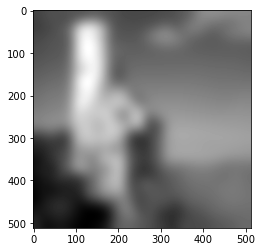

In [56]:
# Tiempo de filtrado paso bajo en dominio espacial 
import time

I = cv2.imread("Lichtenstein_img_processing_test.png", 0)
w = I.shape[0]

# Montamos el kernel gaussiano 
sigma = 15
ksize = 1 + 6*sigma
print("ksize=\n", ksize)
gaussian_kernel = cv2.getGaussianKernel(ksize, sigma)

g = gaussian_kernel.reshape(ksize, 1) * gaussian_kernel.reshape(1, ksize)
g /= g.sum()

# Aunque la máscara gaussiana es separable queremos medir tiempos con una cuadrada
t1 = time.process_time()
I_filtered = cv2.filter2D(I,-1,g) # Filter 2D usa FFT con ksize > 11!!!
t2 = time.process_time()
print("tiempo conv=", t2-t1)

plt.imshow(I_filtered, cmap="gray")

tiempo fft2= 0.014886775000000796


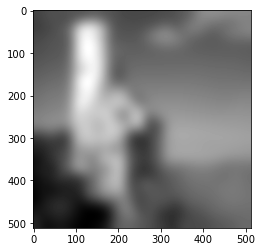

In [57]:
# Tiempo de filtrado paso bajo usando la transformada de Fourier
import time

# Montamos el kernel gaussiano 
sigma = 15
gaussian_kernel_vt = cv2.getGaussianKernel(I.shape[0], sigma)
gaussian_kernel_hz = cv2.getGaussianKernel(I.shape[1], sigma)
g = gaussian_kernel_hz.reshape(I.shape[1], 1) * gaussian_kernel_vt.reshape(1, I.shape[0])

G = np.fft.fft(g)

t1 = time.process_time()
C_I = np.fft.fft2(I)
C_I_filtered = C_I * G
I_filtered2 = np.fft.ifft2(C_I_filtered)
t2 = time.process_time()
I_filtered2 = np.abs(I_filtered2)
print("tiempo fft2=", t2-t1)

plt.imshow(I_filtered, cmap="gray")